# Linear Regression

## Create dataset

In [1]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

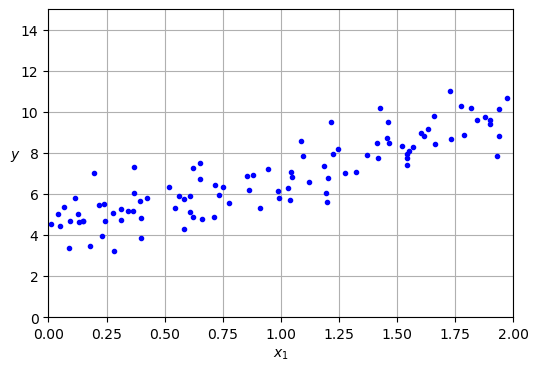

In [2]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
#save_fig("generated_data_plot")
plt.show()

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [4]:
X_new = np.array([[0], [2]])

In [5]:
y_predict=lin_reg.predict(X_new)

In [6]:
y_predict

array([[4.21509616],
       [9.75532293]])

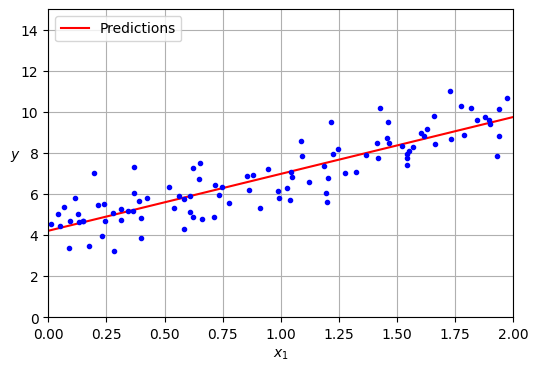

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
#save_fig("linear_model_predictions_plot")

plt.show()

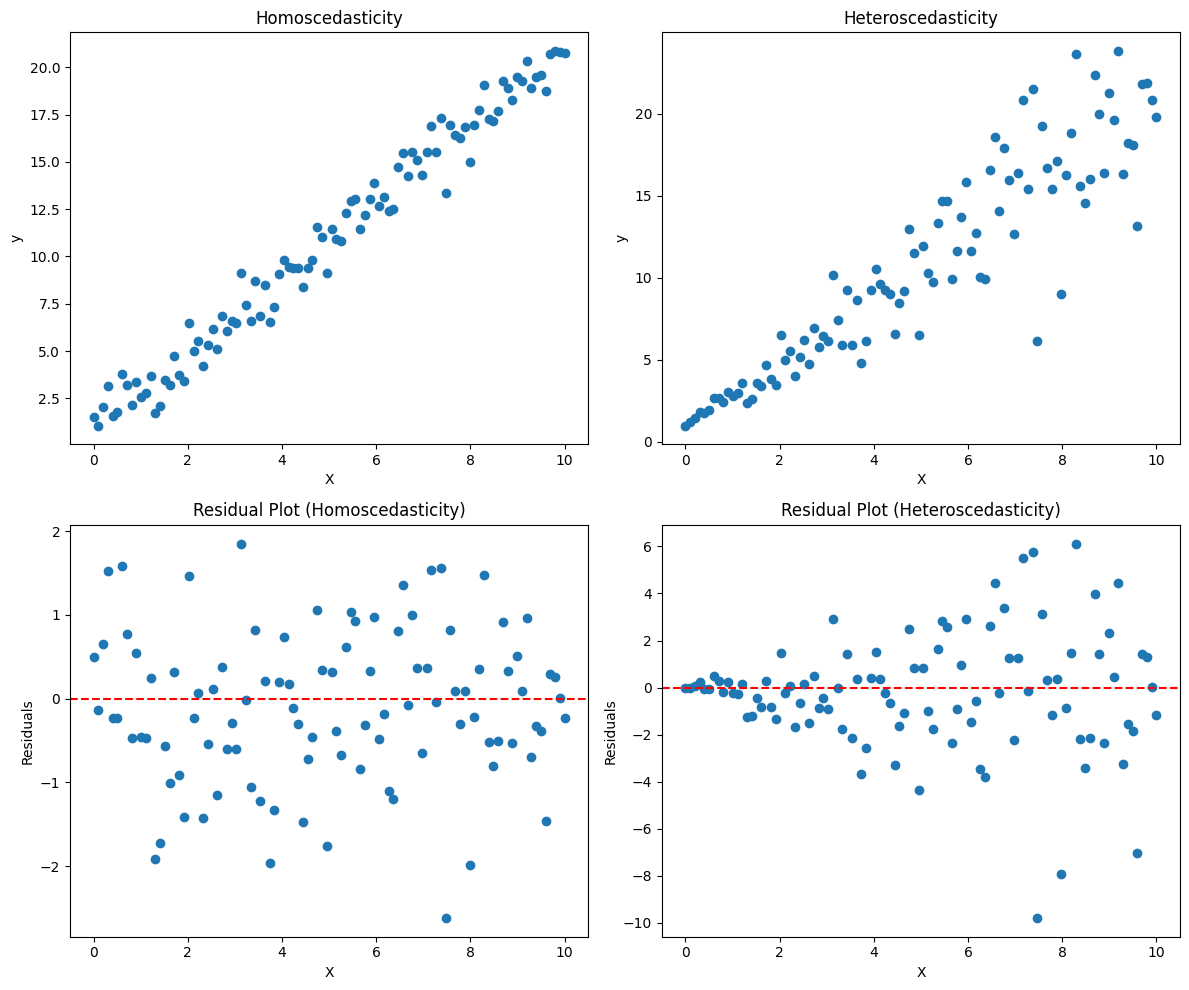

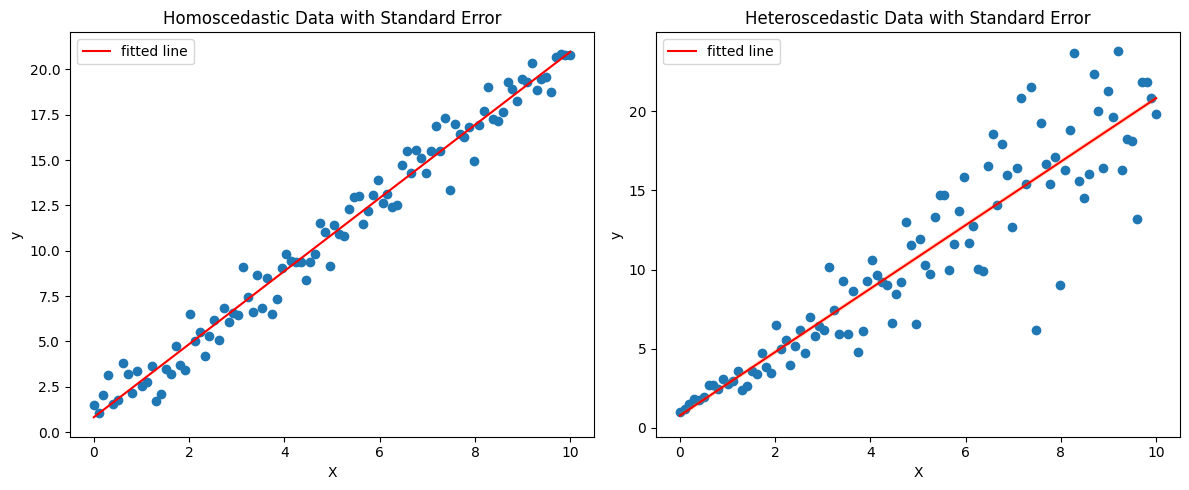

In [27]:
# Demonstrating homoscedasticity and heteroscedasticity

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate homoscedastic data
np.random.seed(42)
X_homo = np.linspace(0, 10, 100)
y_homo = 2 * X_homo + 1 + np.random.normal(0, 1, 100)

# Generate heteroscedastic data
np.random.seed(42)
X_hetero = np.linspace(0, 10, 100)
y_hetero = 2 * X_hetero + 1 + np.random.normal(0, 0.5 * X_hetero, 100)

# Plot homoscedastic data
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.scatter(X_homo, y_homo)
plt.title('Homoscedasticity')
plt.xlabel('X')
plt.ylabel('y')

# Plot heteroscedastic data
plt.subplot(222)
plt.scatter(X_hetero, y_hetero)
plt.title('Heteroscedasticity')
plt.xlabel('X')
plt.ylabel('y')

# Residual/errors plots
y_pred_homo = 2 * X_homo + 1
residuals_homo = y_homo - y_pred_homo

y_pred_hetero = 2 * X_hetero + 1
residuals_hetero = y_hetero - y_pred_hetero

plt.subplot(223)
plt.scatter(X_homo, residuals_homo)
plt.title('Residual Plot (Homoscedasticity)')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(224)
plt.scatter(X_hetero, residuals_hetero)
plt.title('Residual Plot (Heteroscedasticity)')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Standard error plots
plt.figure(figsize=(12, 5))

# Homoscedastic standard error
plt.subplot(121)
slope, intercept, r_value, p_value, std_err = stats.linregress(X_homo, y_homo)
plt.scatter(X_homo, y_homo)
plt.plot(X_homo, intercept + slope*X_homo, 'r', label='fitted line')
plt.fill_between(X_homo, 
                 intercept + slope*X_homo - std_err*2,
                 intercept + slope*X_homo + std_err*2, 
                 alpha=0.2)
plt.title('Homoscedastic Data with Standard Error')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Heteroscedastic standard error
plt.subplot(122)
slope, intercept, r_value, p_value, std_err = stats.linregress(X_hetero, y_hetero)
plt.scatter(X_hetero, y_hetero)
plt.plot(X_hetero, intercept + slope*X_hetero, 'r', label='fitted line')
plt.fill_between(X_hetero, 
                 intercept + slope*X_hetero - std_err*2,
                 intercept + slope*X_hetero + std_err*2, 
                 alpha=0.2)
plt.title('Heteroscedastic Data with Standard Error')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


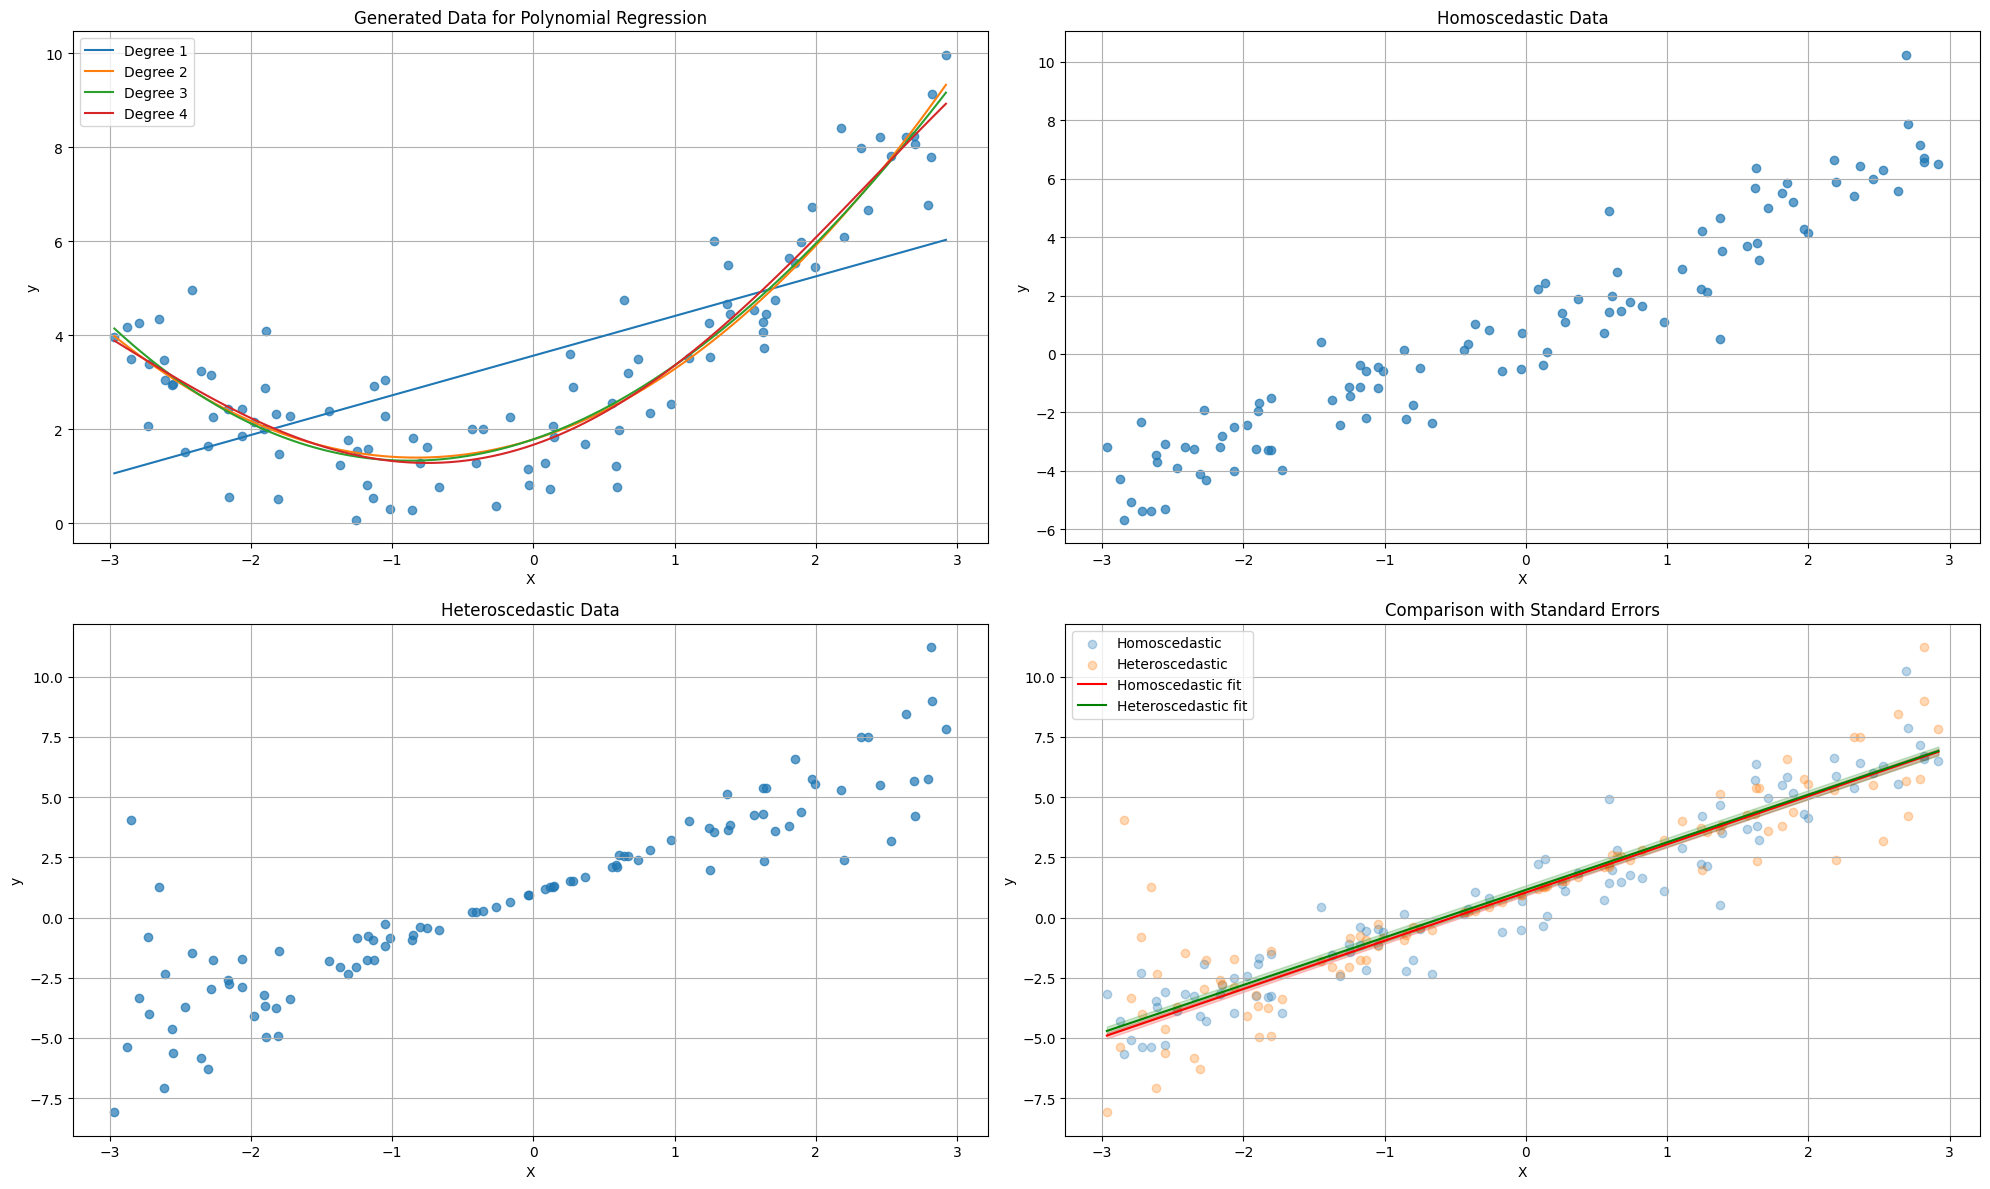

Shape of X: (100, 1)
Shape of y: (100, 1)


In [29]:
# Generate data for polynomial regression
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Generate homoscedastic and heteroscedastic data
X_homo = X
y_homo = 2 * X + 1 + np.random.randn(m, 1)
X_hetero = X
y_hetero = 2 * X + 1 + np.random.randn(m, 1) * (0.5 * X**2)

plt.figure(figsize=(20, 12))

# Plot for polynomial regression data
plt.subplot(221)
plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data for Polynomial Regression")
plt.grid(True)

# Add polynomial regression lines
degrees = [1, 2, 3, 4]
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(poly_features.transform(X_range))
    plt.plot(X_range, y_pred, label=f'Degree {degree}')

plt.legend()

# Plot for homoscedastic data
plt.subplot(222)
plt.scatter(X_homo, y_homo, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Homoscedastic Data")
plt.grid(True)

# Plot for heteroscedastic data
plt.subplot(223)
plt.scatter(X_hetero, y_hetero, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Heteroscedastic Data")
plt.grid(True)

# Plot standard errors
plt.subplot(224)
slope_homo, intercept_homo, _, _, std_err_homo = stats.linregress(X_homo.flatten(), y_homo.flatten())
slope_hetero, intercept_hetero, _, _, std_err_hetero = stats.linregress(X_hetero.flatten(), y_hetero.flatten())

plt.scatter(X_homo, y_homo, alpha=0.3, label='Homoscedastic')
plt.scatter(X_hetero, y_hetero, alpha=0.3, label='Heteroscedastic')

X_sorted = np.sort(X, axis=0)
plt.plot(X_sorted, intercept_homo + slope_homo * X_sorted, 'r', label='Homoscedastic fit')
plt.plot(X_sorted, intercept_hetero + slope_hetero * X_sorted, 'g', label='Heteroscedastic fit')

plt.fill_between(X_sorted.flatten(), 
                 (intercept_homo + slope_homo * X_sorted - 2 * std_err_homo).flatten(),
                 (intercept_homo + slope_homo * X_sorted + 2 * std_err_homo).flatten(), 
                 alpha=0.2, color='r')
plt.fill_between(X_sorted.flatten(), 
                 (intercept_hetero + slope_hetero * X_sorted - 2 * std_err_hetero).flatten(),
                 (intercept_hetero + slope_hetero * X_sorted + 2 * std_err_hetero).flatten(), 
                 alpha=0.2, color='g')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison with Standard Errors")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# Gradient Descent
## Batch Gradient Descent

In [8]:
from sklearn.preprocessing import add_dummy_feature

eta = 0.1  # learning rate
n_epochs = 1000
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    #print(epoch, gradients, theta)

The trained model parameters:

In [9]:
theta

array([[4.21509616],
       [2.77011339]])

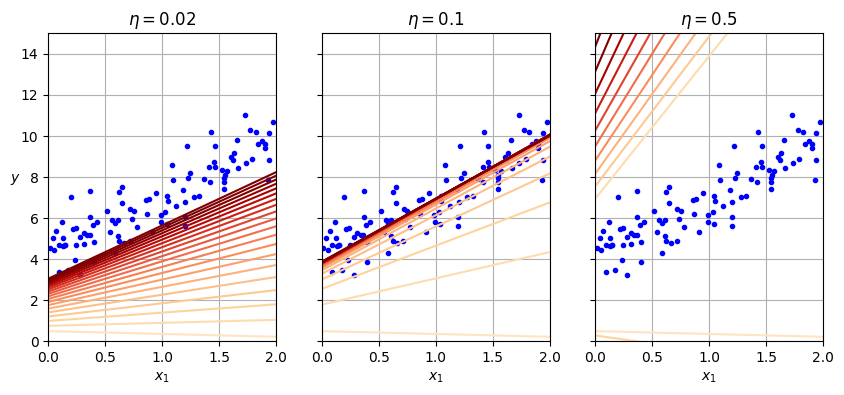

In [11]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl
import numpy as np

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate new x values
    X_new_b = add_dummy_feature(X_new)  # Add bias term to new x values
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
#save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

In [12]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

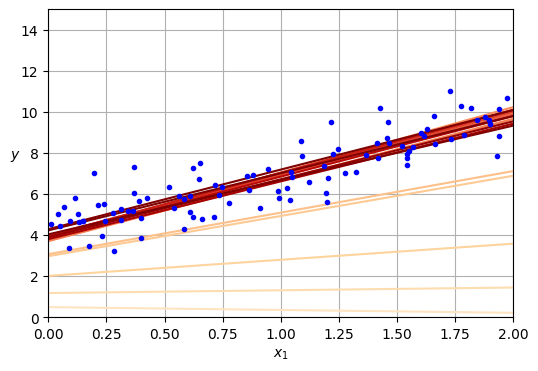

In [14]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

# Define X_new and X_new_b here
X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate new x values
X_new_b = add_dummy_feature(X_new)  # Add bias term to new x values

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
#save_fig("sgd_plot")
plt.show()

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

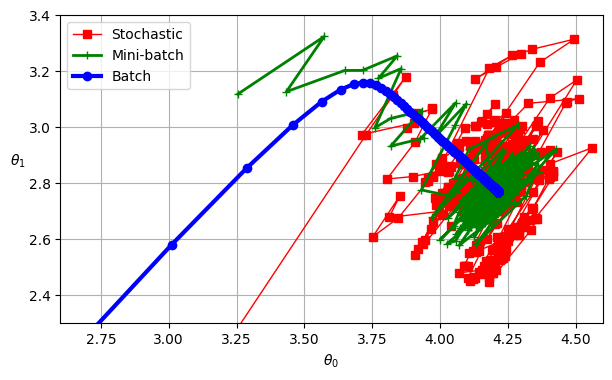

In [18]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
#save_fig("gradient_descent_paths_plot")
plt.show()

## Mini-batch SGD using SGDRegressor and partial_fit (one step fitting)

In [19]:
import random

minisgd = SGDRegressor(eta0=0.01)

batch_size = 30

for i in range(1000):
    
    idx = random.sample(range(X.shape[0]),batch_size)
    minisgd.partial_fit(X[idx], y.ravel()[idx])
    
minisgd.intercept_, minisgd.coef_

(array([4.22721759]), array([2.75164483]))

# Polynomial Regression

In [20]:
np.random.seed(42)
m2 = 100
X2 = 6 * np.random.rand(m2, 1) - 3
y2 = 0.5 * X2 ** 2 + X2 + 2 + np.random.randn(m2, 1)

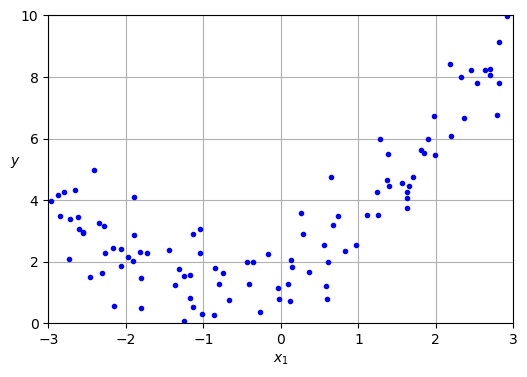

In [ ]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X2, y2, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("quadratic_data_plot")
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly_features.fit_transform(X2)
X2[0]

array([-0.75275929])

In [22]:
X2_poly[0]

array([-0.75275929,  0.56664654])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X2_poly, y2)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

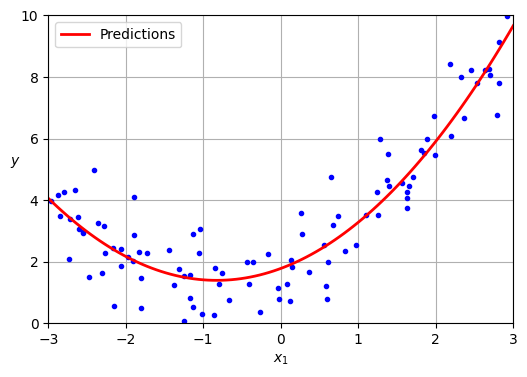

In [24]:
# extra code – this cell generates and saves Figure 4–13

X2_new = np.linspace(-3, 3, 100).reshape(100, 1)
X2_new_poly = poly_features.transform(X2_new)
y2_new = lin_reg.predict(X2_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X2, y2, "b.")
plt.plot(X2_new, y2_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("quadratic_predictions_plot")
plt.show()

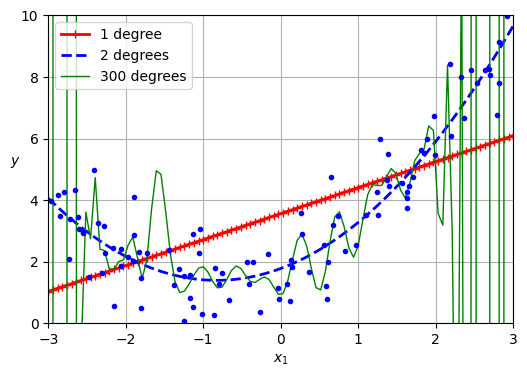

In [25]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X2, y2)
    y2_newbig = polynomial_regression.predict(X2_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X2_new, y2_newbig, style, label=label, linewidth=width)

plt.plot(X2, y2, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("high_degree_polynomials_plot")
plt.show()